In [1]:
# Importamos las bibliotecas necesarias


# Importamos las bibliotecas necesarias
# bibliotecas para manipulación de datos
import pandas as pd


# bibliotecas para visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para preprocesamiento de los datos    
from sklearn.model_selection import train_test_split


# bibliotecas para la creación del modelo de clasificación 
# Incluya aquí las bibliotecas necesarias para crear el modelo de clasificación 
from sklearn.ensemble import RandomForestClassifier



# bibliotecas para evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas 
# Ruta del archivo CSV

ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV

# Cargar el archivo CSV en un DataFrame de Pandas 
data = pd.read_csv(ruta_archivo)

In [3]:
# Información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usa

In [4]:
print("\nPrimeras filas del conjunto de datos:")
data.head(10)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
0,LP001002,Hombre,No,0,Graduado,No,5849,0.0,NaN,360.0,1.0,Urbano,Y
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y
5,LP001011,Hombre,Si,2,Graduado,Si,5417,4196.0,267.0,360.0,1.0,Urbano,Y
6,LP001013,Hombre,Si,0,Not Graduado,No,2333,1516.0,95.0,360.0,1.0,Urbano,Y
7,LP001014,Hombre,Si,3+,Graduado,No,3036,2504.0,158.0,360.0,0.0,SemiUrbano,N
8,LP001018,Hombre,Si,2,Graduado,No,4006,1526.0,168.0,360.0,1.0,Urbano,Y
9,LP001020,Hombre,Si,1,Graduado,No,12841,10968.0,349.0,360.0,1.0,SemiUrbano,N


In [5]:
# Ver los valores únicos de la columna 'area_propiedad'
valores_unicos = data[' area_propiedad'].unique()
print(valores_unicos)

['Urbano' 'Rural' 'SemiUrbano']


In [6]:
#normalizamos algunas columnas
data[' educacion'] = data[' educacion'].map({'Graduado': 1, 'Not Graduado': 0})
data[' autoempleado'] = data[' autoempleado'].map({'Si': 1, 'No': 0})
data[' area_propiedad'] = data[' area_propiedad'].map({'Urbano': 2, 'Rural': 0, 'SemiUrbano': 1})

In [7]:
# Mostrar estadísticas descriptivas generales

print("\nEstadísticas descriptivas:")
print(data.describe())
# 


Estadísticas descriptivas:
        educacion  autoempleado  ingresos_solicitante  ingresos_cosolicitante  \
count  614.000000    582.000000            614.000000              614.000000   
mean     0.781759      0.140893           5403.459283             1621.245798   
std      0.413389      0.348211           6109.041673             2926.248369   
min      0.000000      0.000000            150.000000                0.000000   
25%      1.000000      0.000000           2877.500000                0.000000   
50%      1.000000      0.000000           3812.500000             1188.500000   
75%      1.000000      0.000000           5795.000000             2297.250000   
max      1.000000      1.000000          81000.000000            41667.000000   

       monto_prestamo  plazo_prestamo  historial_crediticio  area_propiedad  
count      592.000000       600.00000            564.000000      614.000000  
mean       146.412162       342.00000              0.842199        1.037459  
std     

In [8]:
# Paso 3: Preprocesamiento de datos
 
# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

In [9]:
# Mostrar estadísticas descriptivas generales

print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
        educacion  autoempleado  ingresos_solicitante  ingresos_cosolicitante  \
count  480.000000    480.000000            480.000000              480.000000   
mean     0.797917      0.137500           5364.231250             1581.093583   
std      0.401973      0.344734           5668.251251             2617.692267   
min      0.000000      0.000000            150.000000                0.000000   
25%      1.000000      0.000000           2898.750000                0.000000   
50%      1.000000      0.000000           3859.000000             1084.500000   
75%      1.000000      0.000000           5852.500000             2253.250000   
max      1.000000      1.000000          81000.000000            33837.000000   

       monto_prestamo  plazo_prestamo  historial_crediticio  area_propiedad  
count      480.000000      480.000000            480.000000      480.000000  
mean       144.735417      342.050000              0.854167        1.022917  
std     

In [10]:
# mostramos nuevemamente la información general del dataset 
# para verificar que no hayan nulos

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    int64  
 5    autoempleado            480 non-null    float64
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    int64  
 12   estado_prestamo         480 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 52.5+ KB
None


In [11]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[[" ingresos_solicitante", " educacion", " autoempleado", " monto_prestamo", " ingresos_cosolicitante"]]
y = data[' estado_prestamo']

In [12]:
# mostramos la información de las características   
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    ingresos_solicitante    480 non-null    int64  
 1    educacion               480 non-null    int64  
 2    autoempleado            480 non-null    float64
 3    monto_prestamo          480 non-null    float64
 4    ingresos_cosolicitante  480 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 22.5 KB
None


In [13]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'estado_prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(y.value_counts())

data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

 estado_prestamo
Y    332
N    148
Name: count, dtype: int64


C:\Users\rchic\AppData\Local\Temp\ipykernel_10612\1994151085.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})


In [14]:
# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
from sklearn.tree import DecisionTreeClassifier


modelo = RandomForestClassifier(random_state=42)

# usamos otro modelo de clasificación
modelo = DecisionTreeClassifier(random_state=42)

modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


Precisión del modelo: 0.58


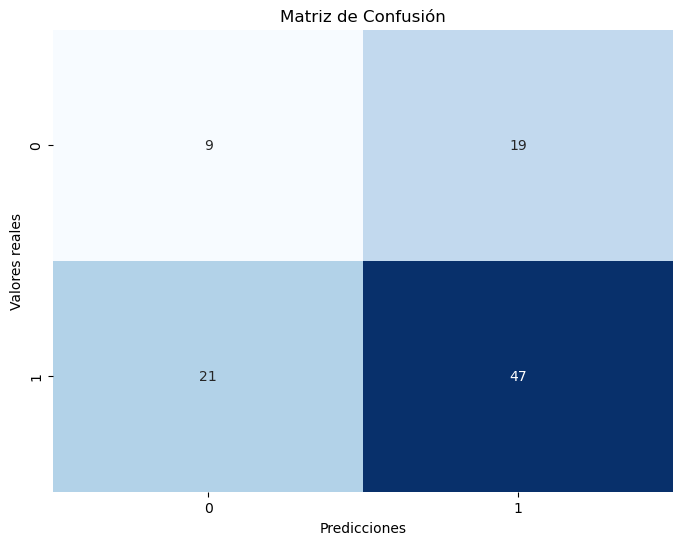


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.30      0.32      0.31        28
           Y       0.71      0.69      0.70        68

    accuracy                           0.58        96
   macro avg       0.51      0.51      0.51        96
weighted avg       0.59      0.58      0.59        96



In [16]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [17]:
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [21]:
# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    ' ingresos_solicitante': [10000],
    ' educacion': [0],
    ' autoempleado': [0],
    ' monto_prestamo': [300],
    ' ingresos_cosolicitante': [0]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.


Predicción: ['Y']


In [ ]:
# Ejercicios a realizar:

# 1. Utiliza otras variables del conjunto de datos para predecir el prestamo, ¿Cómo afectó la predicción del modelo?
    #  Logicamente cambia la prediccion
# 2. Utliza otro algoritmo y compara los resultados los resultados. ¿Cómo afecta la precisión del modelo? 

